# Deep Learning: Coding Assignment 1

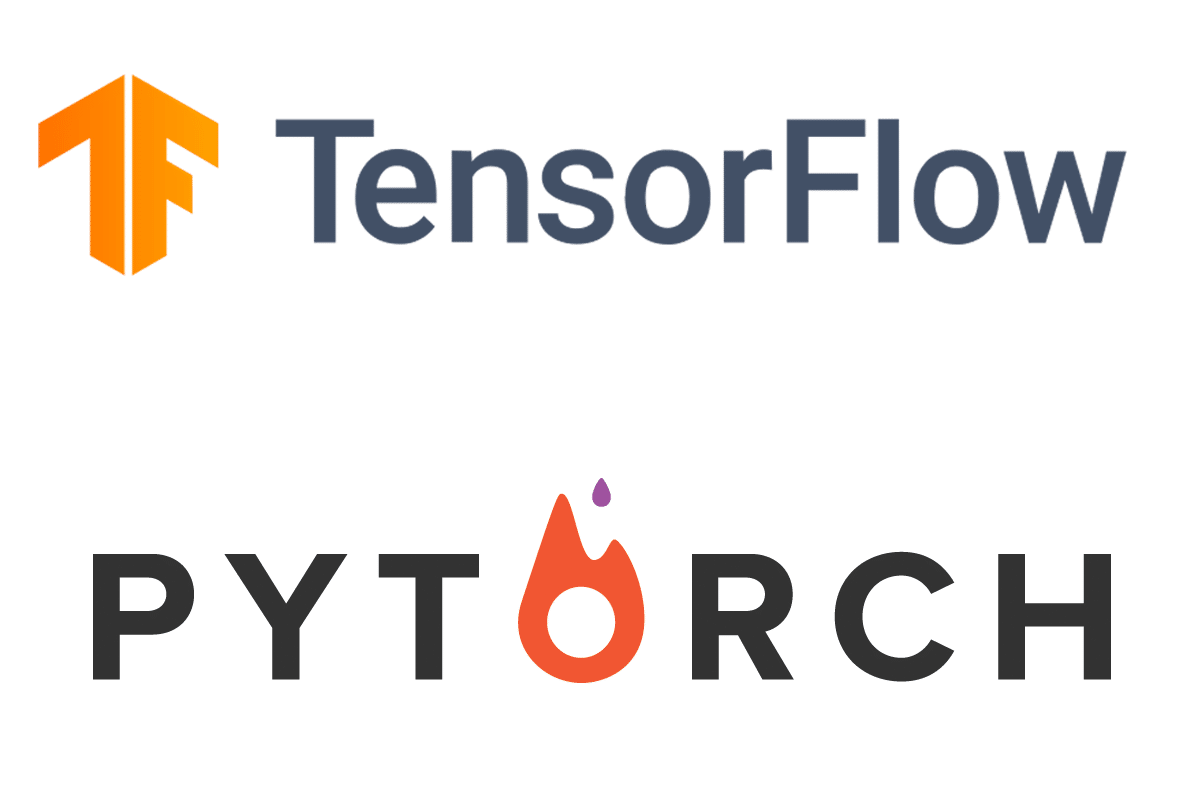

# Hello everyone :
Welcome to the first assignment for your Deep Learning course. In this homework, we will cover and reinforce some of the concepts you taught in your class. I hope you can find a better appreciation and deepen your understanding of the subject matter.
In this assignment, we will focus on the following topics:
1. Vectorization
2. Gradient Descent
3. Linear Regression
4. Logistic Regression
5. MNIST Classification using Multilayer Perceptron

# Prerequisites:
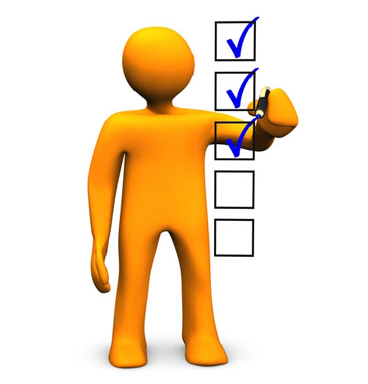

1. Please do not replica your assignments. ❌
2. On the one hand, Your codes ought to include explanations. On the other hand, You do not demand to consider any separate file for your report.   ✅
* **There is no obligation that your answer includes many details. Your response can be concise but should be accurate and to the point.**
   
* **Either Persian or English is acceptable for your report.** Nonetheless, if you choose to write Persian in Markdown, please make sure it's legible before submitting your notebook.

In [1]:
import numpy as np
import pandas as pd
import torch
import time

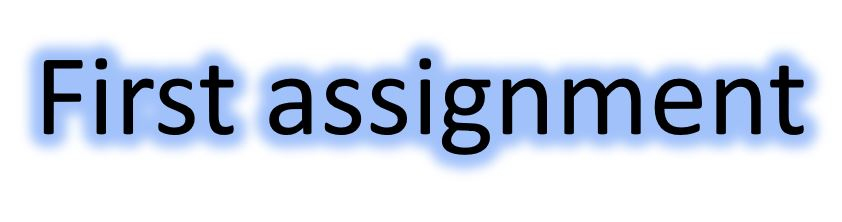

In this section, we get familiar with vectorization. As you learned in your class, When training our models, we typically want to process whole mini-batches of examples simultaneously. In fact, doing this requires that we vectorize computations and leverage fast linear algebra libraries rather than writing costly for-loops.

❓ **Practice:**  
**We want you to implement the matrix multiplication operation twice vectorization technique and non-vectorization(loops). Afterward, you should compare two strategies. Indeed, your answer should comprise an analogy of the execution time of two methods.** \
✍ Required matrices ✍ \
A = np.random.randn(200,300)\
B = np.random.randn(300,400)

In [2]:
A = np.random.randn(200, 300)
B = np.random.randn(300, 400)

In [3]:
# Vectorized version
vectorized_tic = time.time()
vectorized_C = np.dot(A, B)
vectorized_tac = time.time()

In [4]:
# Non-vectorized version
non_vectorized_tic = time.time()
m = A.shape[0]
l = A.shape[1]
n = B.shape[1]
non_vectorized_C = np.zeros((m, n))
for i in range(m):
    for j in range(n):
        c = 0
        for k in range(l):
            c += A[i][k] * B[k][j]
        non_vectorized_C[i][j] = c
non_vectorized_tac = time.time()

In [5]:
# Check both results are equal (due to datatypes usage they have small differences)
print(np.allclose(vectorized_C, non_vectorized_C))

True


In [6]:
# Compare the runtime of the two approaches
print("Time elapsed in vectorized approach: " + str(vectorized_tac - vectorized_tic) + " seconds")
print("Time elapsed in non-vectorized approach: " + str(non_vectorized_tac - non_vectorized_tic) + " seconds")

Time elapsed in vectorized approach: 0.0030040740966796875 seconds
Time elapsed in non-vectorized approach: 20.116565227508545 seconds


We see that the vectorized approach is almost **10000** times faster!

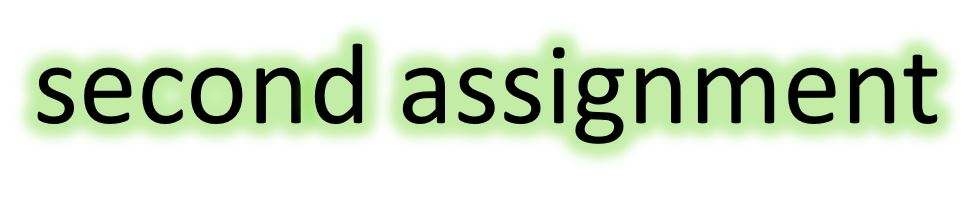

Below, I am enabling CUDA to use my GPU for tensor operations.

In [7]:
# Check if CUDA (GPU) is available
if torch.cuda.is_available():
    print("CUDA is available.")
    # Get the number of available CUDA devices
    num_cuda_devices = torch.cuda.device_count()
    print(f"Number of CUDA devices: {num_cuda_devices}")
else:
    print("CUDA is not available on this system.")

CUDA is available.
Number of CUDA devices: 1


In [8]:
# Check device properties
for i in range(num_cuda_devices):
    properties = torch.cuda.get_device_properties(i)
    print(f"Device {i}: {properties.name}, Total Memory: {properties.total_memory / 1e9} GB")

Device 0: GeForce GTX 1650, Total Memory: 4.294967296 GB


In [9]:
# Enable the CUDA device
if torch.cuda.is_available():
    my_gpu = torch.device("cuda")

In [10]:
# Verify the current device
current_device = torch.cuda.current_device()
print(f"Current CUDA device: {current_device}")

Current CUDA device: 0


$\color{green}{\text{This section is divided into three parts}}$: \
A) First of all, you will learn the basics of differentiation:\
$\color{red}{\text{Indication}}$: \
For instance:
consider the following function: \
$y=x^{2}+2x+1$ \
The derivative is given by:\
$\frac{\mathrm{dy(x)}}{\mathrm{dx}}=2x+2$

$\frac{\mathrm{dy(x=2)}}{\mathrm{dx}}=2(2)+2=6$\
❓ **Practice 1:**\
Determine the derivative of $ y = 2x^3+x $ at $x=1$\
B) Second, We can also calculate <b>Partial Derivatives</b>.\
❓ **Practice 2:**\
Try to determine partial derivative  $u$ and $v$ of the following function where $u=1$ and $v=2$: $f(u,v)=vu+u^{2}$ \
$\color{red}{\text{Clue}}$: 

1. Take the derivative with respect to $u$:
2. Now, take the derivative with respect to $v$:

C) Third, we can calculate the minimum of any given differentiable function through:

Gradient descent is a method to find the minimum of a function, it can be applied to functions with multiple dimensions.
$$x_{i+1} = x_i - \alpha \frac{\partial F(x = x_i)}{\partial x},\space for\space i = 1, \cdots, n.$$
❓ **Practice 3:**

*   Find the minimum of $f(x)=x^2$ 

*   Find the minimum of $f(x)= x.cos(px)$
$\color{blue}{\text{(First you need to clarify what feature this function has) }}$

$\color{red}{\text{Hint: You have to do these stages}}$:


1.   Definition function
2.   Define parameters for training
3.   Plot original function
4.   Training
5.   Plot Approximate values

$\color{red}{\text{Given values}}$:

For $F(x)=x^2$, $x=1000$, and number of iteration = 500\
For $F(x)= x.cos(px)$, $x=10$, $p=0.15$, and number of iteration = 10

#### Practice 1

In [11]:
# Define a tensor of size 1 storing value 1
x = torch.ones(1, requires_grad = True, device = my_gpu)
print(x)

tensor([1.], device='cuda:0', requires_grad=True)


In [12]:
# Define y = 2x ^ 3 + x function
y = 2 * x ** 3 + x
print(y)

tensor([3.], device='cuda:0', grad_fn=<AddBackward0>)


In [13]:
# Calculate gradient of y with respect to x
y.backward()
print(x.grad)

tensor([7.], device='cuda:0')


#### Practice 2

In [14]:
# Define u and v as tensors
v = torch.tensor(2.0, requires_grad = True, device = my_gpu)
u = torch.tensor(1.0, requires_grad = True, device = my_gpu)

# Define the function y = vu + u ^ 2
y = v * u + u ** 2

In [15]:
# Use retain_graph=True: If you need to perform
# multiple backward passes through the same graph
# or access saved tensors after calling backward(),
# you can specify retain_graph=True when calling
# backward(). This retains the graph and prevents
# its intermediate values from being freed.

# y.backward(retain_graph = True)


y.backward()

In [16]:
# Take the partial derivative with respect to u
print(u.grad)

tensor(4., device='cuda:0')


In [17]:
# Take the partial derivative with respect to v
print(v.grad)

tensor(1., device='cuda:0')


In [18]:
u

tensor(1., device='cuda:0', requires_grad=True)

#### Practice 3

In [19]:
# initialize x and the function y = x ^ 2
x = torch.tensor([1000.0], requires_grad = True, device = my_gpu)
y = x ** 2

In [20]:
# train
num_epochs = 500
alpha = 0.1
for i in range(num_epochs):
    y.backward()
    x.grad
    updated_x = x - alpha * x.grad
    # Create a new tensor with gradients enabled
    x = updated_x.clone().detach().requires_grad_(True)
    y = x ** 2
    print("x = ", x.item(), "y = ", y.item())

x =  800.0 y =  640000.0
x =  640.0 y =  409600.0
x =  512.0 y =  262144.0
x =  409.6000061035156 y =  167772.171875
x =  327.67999267578125 y =  107374.1796875
x =  262.14398193359375 y =  68719.46875
x =  209.71517944335938 y =  43980.45703125
x =  167.7721405029297 y =  28147.490234375
x =  134.21771240234375 y =  18014.39453125
x =  107.3741683959961 y =  11529.2119140625
x =  85.89933776855469 y =  7378.6962890625
x =  68.71946716308594 y =  4722.365234375
x =  54.9755744934082 y =  3022.313720703125
x =  43.98046112060547 y =  1934.281005859375
x =  35.18436813354492 y =  1237.9398193359375
x =  28.14749526977539 y =  792.281494140625
x =  22.517995834350586 y =  507.0601501464844
x =  18.01439666748047 y =  324.51849365234375
x =  14.411517143249512 y =  207.69183349609375
x =  11.529213905334473 y =  132.9227752685547
x =  9.223371505737305 y =  85.0705795288086
x =  7.378697395324707 y =  54.44517517089844
x =  5.902957916259766 y =  34.844913482666016
x =  4.7223663330078125 

In [42]:
# initialize x and the function y = x.cos(px)
p = 0.15
x = torch.tensor([10.0], requires_grad = True, device = my_gpu)
y = x * torch.cos(p * x)

In [45]:
# train
num_epochs = 100
alpha = 0.1
for i in range(num_epochs):
    y.backward()
    print(x.grad)
    #print(x.grad)
    updated_x = x - alpha * x.grad
    # Create a new tensor with gradients enabled
    x = updated_x.clone().detach().requires_grad_(True)
    y = x * torch.cos(p * x)
    print("x = ", x.item(), "y = ", y.item())

tensor([-1.9389], device='cuda:0')
x =  12.01883316040039 y =  -2.7637593746185303
tensor([-1.9845], device='cuda:0')
x =  12.217279434204102 y =  -3.1620209217071533
tensor([-2.0290], device='cuda:0')
x =  12.420175552368164 y =  -3.5781090259552
tensor([-2.0721], device='cuda:0')
x =  12.627388954162598 y =  -4.011832237243652
tensor([-2.1137], device='cuda:0')
x =  12.838756561279297 y =  -4.462835311889648
tensor([-2.1533], device='cuda:0')
x =  13.054089546203613 y =  -4.930604457855225
tensor([-2.1908], device='cuda:0')
x =  13.27316665649414 y =  -5.414438247680664
tensor([-2.2257], device='cuda:0')
x =  13.49573802947998 y =  -5.913460731506348
tensor([-2.2579], device='cuda:0')
x =  13.72152328491211 y =  -6.426593780517578
tensor([-2.2869], device='cuda:0')
x =  13.950211524963379 y =  -6.952584266662598
tensor([-2.3125], device='cuda:0')
x =  14.181463241577148 y =  -7.4899749755859375
tensor([-2.3345], device='cuda:0')
x =  14.414911270141602 y =  -8.037139892578125
tensor(

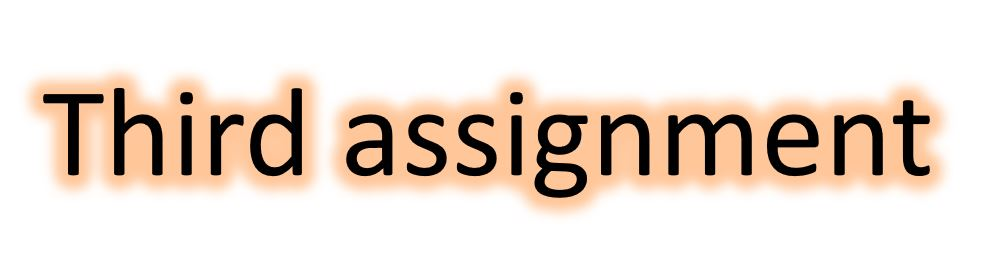

As is well known, the objective of a linear regression task is to minimize the discrepancy between the regression coefficient's anticipated and observed values (actual values). If regression is defined as follows, then this implies that:
$$ y = w^\mathbf{T} x + b,$$
Our goal is to minimize the following loss function by setting $w$ and $b$ in this manner:
$$ MSE = \frac{1}{n} \sum_{i=1}^{n} (Y_i - \hat{Y_i})^2,$$
Where 

MSE	=	mean squared error 

n =	number of data points 

$Y_{i}$	=	observed values 

$\hat{Y}_{i}$	=	predicted values

❓ Practice: 

The third goal in this part is to use the MSE loss function and the gradient descent method to train a linear regressor.
* After every iteration, plot the loss values.
* Plot original data and fitted line

# **Dataset**

In [ ]:
X_numpy, Y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise= 20, random_state=1)

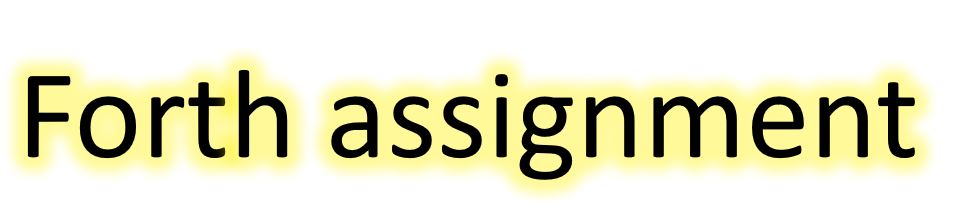

 ❓ Practice: 
 
In this section, You must demonstrate that a single-layered neural network (perceptron) cannot accurately classify the following dataset. Describe the reasons behind this.

#**Dataset**

In [ ]:
from sklearn.datasets import make_blobs
X_numpy, Y_numpy = make_blobs(
    n_features=2, n_samples=100, centers=4, random_state=42,
)
Y_numpy[Y_numpy==2] = 0
Y_numpy[Y_numpy==3] = 1

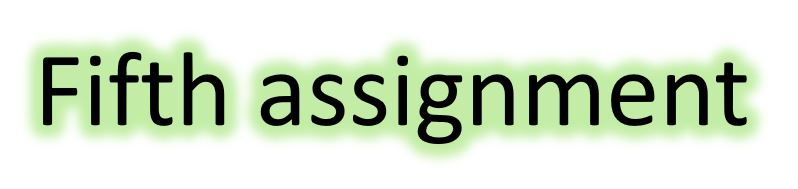

❓ Practice: 

Using the knowledge you gained from the lecture, you should be able to train a multilayer perceptron (MLP) in this exercise to identify images from the MNIST database that have handwritten digits.
The following steps will comprise the process:
1. Load and visualize the data
2. Define a neural network
3. Train the model
4. Evaluate the performance of our trained model on a test dataset 

$\color{red}{\text{Question}}$: 

Given that MNIST classification is an example of multiclass classification, in your opinion, what changes should happen in the network structure compared to binary classification?

**Bonus**

The model with the highest accuracy on the test receives an extra point.

**About Dataset:**

The MNIST dataset contains black and white, hand-written (numerical) digits that are 28x28 pixels large. This is a data set that is typically used for demonstrations of machine learning models, and as a first data set to test new types of models.

$\color{red}{\text{Cue}}$: 

You can use PyTorch and TensorFlow to get the dataset. With a brief search on the Internet, you can learn how to download, extract, and load the MNIST data.

# $\color{green}{\text{Grades}}$:

Question Number  | Scores
-------------------|------------------
Question 1    | 15
Question 2    | 20
Question 3 | 20
Question 4 | 15
Question 5 | 30